# IMDB Movie Dataset Analysis using SQL

This project analyzes the IMDB movie dataset using SQL embedded in Python (via `sqlite3` or similar). It extracts insights about:
- Popular genres, directors, actors
- Movie production trends
- Ratings and revenue analysis

The goal is to turn raw SQL output into interpretable business insights.



## Objectives

- Connect and query the IMDB SQLite database using SQL in Python.
- Explore dataset tables: `movies`, `directors`, `ratings`, `genres`, etc.
- Perform analytical queries to find top movies, directors, ratings distribution, genre analysis, etc.
- Visualize insights using plots (bar charts, pie charts, histograms).
- Derive conclusions and suggest future enhancements.


## Import Libraries

In [4]:
#To perform mathematical operations
import numpy as np 
#Data Manipulation tool
import pandas as pd 
#Data Visualization tool
import matplotlib.pyplot as plt 
import seaborn as sns 
#Server-less Database
import sqlite3 as sq 

## Hints and Workflow

### Hints:
1. Connect to database → `sqlite3.connect(database)`
2. Use cursor object → `connection.cursor()`
3. Execute SQL queries → `cursor.execute("SQL_QUERY")`
4. Fetch results → `cursor.fetchall()`

### Workflow Steps:
1. Establish connection to SQLite DB
2. Create cursor object
3. Execute queries
4. Store and convert results to DataFrames for analysis


In [6]:
#Connect to SQLite database
db=r"C:\Users\MUSKAN\Desktop\DataScience Projects\IMDB Dataset analysis\archive\movies.sqlite"
conn=sq.connect(db)
curr=conn.cursor()

## Database Schema Overview
Let's understand the structure of tables and relationships in the IMDB dataset.

### Query 1: List all tables available in the database

In [9]:
curr.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(curr.fetchall())

[('movies',), ('sqlite_sequence',), ('directors',)]


### **Observation:**  
The database contains multiple tables such as `movies`, `directors`, etc., which will be explored using SQL queries.


### Query 2: Table Structure & Sample Data

### For movies table:

In [13]:
print("Movies Table Structure:")
curr.execute("PRAGMA table_info(movies);")
for row in curr.fetchall():
    print(row)

print("\nSample rows from 'movies' table:")
curr.execute("SELECT * FROM movies LIMIT 5;")
for row in curr.fetchall():
    print(row)


Movies Table Structure:
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'original_title', 'VARCHAR', 0, None, 0)
(2, 'budget', 'INTEGER', 0, None, 0)
(3, 'popularity', 'INTEGER', 0, None, 0)
(4, 'release_date', 'TEXT', 0, None, 0)
(5, 'revenue', 'INTEGER', 0, None, 0)
(6, 'title', 'TEXT', 0, None, 0)
(7, 'vote_average', 'REAL', 0, None, 0)
(8, 'vote_count', 'INTEGER', 0, None, 0)
(9, 'overview', 'TEXT', 0, None, 0)
(10, 'tagline', 'TEXT', 0, None, 0)
(11, 'uid', 'INTEGER', 0, None, 0)
(12, 'director_id', 'INTEGER', 1, '0', 0)

Sample rows from 'movies' table:
(43597, 'Avatar', 237000000, 150, '2009-12-10', 2787965087, 'Avatar', 7.2, 11800, 'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.', 'Enter the World of Pandora.', 19995, 4762)
(43598, "Pirates of the Caribbean: At World's End", 300000000, 139, '2007-05-19', 961000000, "Pirates of the Caribbean: At World's End", 6.9

### Observation:
- `movies` table has rich metadata useful for various types of analysis.
- Fields like `budget`, `revenue`, and `vote_average` support financial and popularity insights.



### For directors table

In [16]:
print("Directors Table Structure:")
curr.execute("PRAGMA table_info(directors);")
for row in curr.fetchall():
    print(row)

print("\nSample rows from 'directors' table:")
curr.execute("SELECT * FROM directors LIMIT 5;")
for row in curr.fetchall():
    print(row)

Directors Table Structure:
(0, 'name', 'TEXT', 0, None, 0)
(1, 'id', 'INTEGER', 0, None, 1)
(2, 'gender', 'INTEGER', 0, None, 0)
(3, 'uid', 'INTEGER', 0, None, 0)
(4, 'department', 'TEXT', 0, None, 0)

Sample rows from 'directors' table:
('James Cameron', 4762, 2, 2710, 'Directing')
('Gore Verbinski', 4763, 2, 1704, 'Directing')
('Sam Mendes', 4764, 2, 39, 'Directing')
('Christopher Nolan', 4765, 2, 525, 'Directing')
('Andrew Stanton', 4766, 2, 7, 'Directing')


### Observation:
The `directors` table has details like name, ID, gender, and department.  
All entries are from the 'Directing' department, and popular directors like James Cameron and Christopher Nolan are included.


### Query 3: Get all records from the movies table

In [19]:
curr.execute("SELECT * FROM movies")
movies=curr.fetchall()

In [20]:
#Convert the output of the above to Dataframe :row and column
df=pd.DataFrame(movies,columns=['id','original_title','budget','popularity','release_date','revenue',
                                'title','avg_rating','rating_count','overview','tagline',
                                'uid','director_id'])
df.head()

,id,original_title,budget,popularity,release_date,revenue,title,avg_rating,rating_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [21]:
# Basic Info:
df.info

<bound method DataFrame.info of          id                            original_title     budget  popularity  \
0     43597                                    Avatar  237000000         150   
1     43598  Pirates of the Caribbean: At World's End  300000000         139   
2     43599                                   Spectre  245000000         107   
3     43600                     The Dark Knight Rises  250000000         112   
4     43601                               John Carter  260000000          43   
...     ...                                       ...        ...         ...   
4768  48395                               El Mariachi     220000          14   
4769  48396                                 Newlyweds       9000           0   
4770  48397                 Signed, Sealed, Delivered          0           1   
4771  48398                          Shanghai Calling          0           0   
4772  48399                         My Date with Drew          0           1   

     re

### **Observation:**  
The dataset has 13 columns and thousands of records. Fields like `avg_rating`, `budget`, and `release_date` will help in our analysis.


### Query 4: Get all directors

In [24]:
curr.execute("SELECT * FROM directors")
directors=curr.fetchall()
df_directors=pd.DataFrame(directors,columns=["Name","id","gender","UID","department"])
df_directors.head()

,Name,id,gender,UID,department
0,James Cameron,4762,2,2710,Directing
1,Gore Verbinski,4763,2,1704,Directing
2,Sam Mendes,4764,2,39,Directing
3,Christopher Nolan,4765,2,525,Directing
4,Andrew Stanton,4766,2,7,Directing


In [25]:
# Directors table info
df_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2349 non-null   object
 1   id          2349 non-null   int64 
 2   gender      2349 non-null   int64 
 3   UID         2349 non-null   int64 
 4   department  2349 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.9+ KB


### Query 5: Count of Movies

In [27]:
curr.execute("SELECT COUNT(Title) FROM movies")
count=curr.fetchall()
print("Number of movies present in the IMDB database:",{count[0][0]})

Number of movies present in the IMDB database: {4773}


### Visualization for Query 5

Movie Count is: 4773


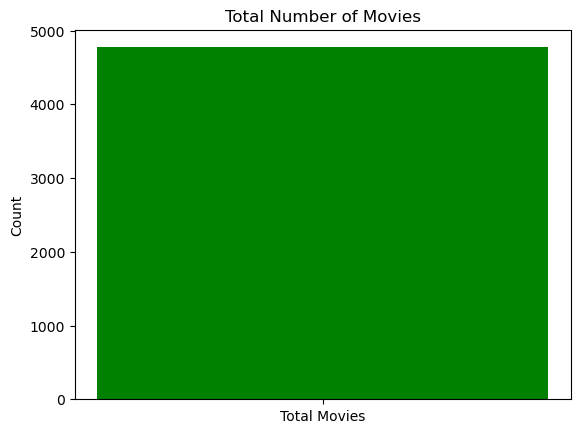

In [29]:
movies_count=curr.execute("SELECT COUNT(*) FROM movies").fetchone()[0]
print(f"Movie Count is: {movies_count}")
plt.bar(['Total Movies'],[movies_count],color='green')
plt.title("Total Number of Movies")
plt.ylabel("Count")
plt.show()

## **Insight:**  
The dataset contains over 4773 movies, offering a significant base for film trend analysis.


### Query 6: Find the specific directors named:James Cameron, Luc Besson, Jhon Woom

In [32]:
curr.execute("SELECT * FROM directors where Name in('James Cameron', 'Luc Besson', 'John Woo')")
name=curr.fetchall()
name

[('James Cameron', 4762, 2, 2710, 'Directing'),
 ('John Woo', 4893, 2, 11401, 'Directing'),
 ('Luc Besson', 4949, 2, 59, 'Directing')]

### Query 7: Find all the directors starting with the name:'Steven'

In [34]:
curr.execute("select * from directors where Name like 'Steven%' ")
ex=curr.fetchall()
print(f"THE DIRECTORS STARTING WITH 'STEVEN' ARE:{ex}")

THE DIRECTORS STARTING WITH 'STEVEN' ARE:[('Steven Spielberg', 4799, 2, 488, 'Directing'), ('Steven Soderbergh', 4909, 2, 1884, 'Directing'), ('Steven Brill', 5013, 2, 32593, 'Directing'), ('Steven Zaillian', 5117, 2, 2260, 'Directing'), ('Steven Quale', 5216, 2, 93214, 'Directing'), ('Steven Seagal', 5221, 2, 23880, 'Directing'), ('Steven E. de Souza', 5390, 2, 1726, 'Directing'), ('Steven Shainberg', 5803, 2, 67795, 'Directing'), ('Steven R. Monroe', 6713, 2, 88039, 'Directing')]


### Query 8: Count the number of female directors

In [36]:
f_c=curr.execute("select count(name) from directors where gender==1")
f_d=curr.fetchall()
print("Total number of female directors we have is:",f_d[0][0])

Total number of female directors we have is: 150


### Visualization for female vs male directors

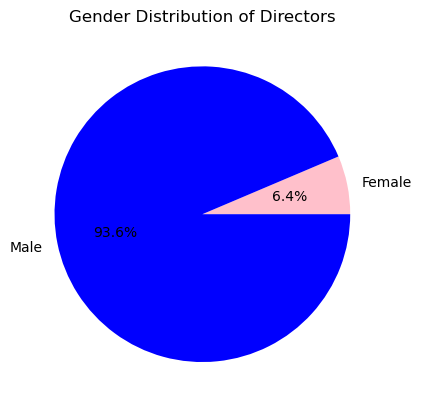

In [38]:
f_c=curr.execute("SELECT COUNT(name) FROM directors WHERE gender==1").fetchone()[0]
total=curr.execute("SELECT COUNT(*) FROM directors").fetchone()[0]
m_c=total-f_c
plt.pie([f_c,m_c],labels=['Female','Male'],autopct='%1.1f%%',colors=['pink','blue'])
plt.title("Gender Distribution of Directors")
plt.show()

## **Insight:**  
Female directors constitute a small percentage of the total, highlighting a gender gap in the film industry.


### Query 9: Find the name of the 10th Female Director from the first.

In [41]:
curr.execute("select Name from directors where gender==1")
f_d=curr.fetchall()
print("Name of the 10th director from the first:",f_d[9][0])

Name of the 10th director from the first: Angelina Jolie


### Query 10: What are the 3 most popular movies?

In [43]:
curr.execute("select Title from  movies order by popularity desc limit 3")
t_p=curr.fetchall()
print(f"Three most popular movies:{t_p}")

Three most popular movies:[('Minions',), ('Interstellar',), ('Deadpool',)]


### Visualization for popular movies

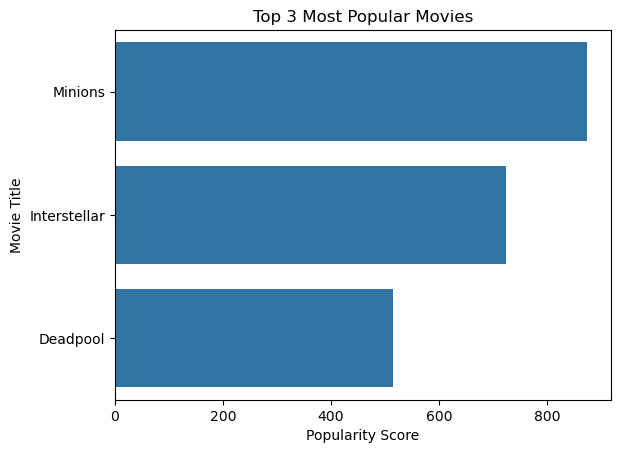

In [45]:
query="""select title, popularity FROM movies ORDER BY popularity desc limit 3"""
df_popular=pd.read_sql_query(query,conn)
sns.barplot(x='popularity', y='title', data=df_popular)
plt.title("Top 3 Most Popular Movies")
plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.show()

## **Insight:**  
The most popular movies show significantly higher scores, indicating strong audience interest and media buzz.


### Query 11: What are the 3 most bankable movies?

In [48]:
curr.execute("SELECT Title from movies order by budget desc limit 3")
bankable_t=curr.fetchall()
#bankable_t
print(f"Three most bankable movies:{bankable_t[0][0],bankable_t[1][0],bankable_t[2][0]}")

Three most bankable movies:('Pirates of the Caribbean: On Stranger Tides', "Pirates of the Caribbean: At World's End", 'Avengers: Age of Ultron')


### Observation:
The top 3 most bankable movies (by budget) are high-investment films, showing studios spent heavily on big franchises and sequels.


### Query 12: Most awarded average voted movie since jan 1st 2000.

In [51]:
curr.execute("SELECT title FROM movies WHERE release_date > '2000-01-01' ORDER BY vote_average DESC LIMIT 1")
most_Awarded = curr.fetchall()
print(most_Awarded[0][0])

Sardaarji


### Query 13: Which movies were direced by Brenda Champan?

In [53]:
curr.execute("Select original_title from movies inner join directors on movies.director_id= directors.id where directors.Name == 'Brenda Chapman' ")
movies_b=curr.fetchall()
movies_b[0][0]

'Brave'

### Query 14: Name the director who has made most of the movies.

In [55]:
curr.execute("select Name from directors inner join movies on directors.id=movies.director_id group by movies.director_id order by count(movies.original_title) desc limit 1")
name_d=curr.fetchall()
name_d[0][0]

'Steven Spielberg'

### Query 15: Name of the director who is most bankable.

In [57]:
curr.execute("select Name from directors inner join movies on directors.id=movies.director_id group by movies.director_id order by sum(budget) desc limit 1")
most_b_d=curr.fetchall()
most_b_d[0][0]

'Steven Spielberg'

## ANALYSIS 2

## Budget Analysis:

### Query 16: Tell the Top 10 highest budget movies.

In [61]:
curr.execute("select original_title from movies order by budget desc limit 10")
Top_10=curr.fetchall()
top_10=pd.DataFrame(curr.execute("select original_title from movies order by budget desc limit 10"))
top_10

,0
0,Pirates of the Caribbean: On Stranger Tides
1,Pirates of the Caribbean: At World's End
2,Avengers: Age of Ultron
3,Superman Returns
4,John Carter
5,Tangled
6,Spider-Man 3
7,The Lone Ranger
8,The Dark Knight Rises
9,Harry Potter and the Half-Blood Prince


### Visualization for top budget movies

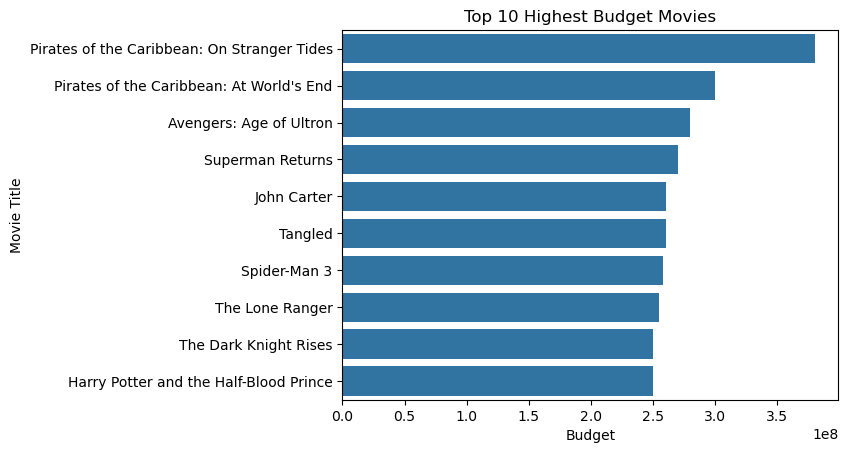

In [63]:
query="""select title, budget FROM movies ORDER BY budget desc limit 10"""
df_budget=pd.read_sql_query(query,conn)
sns.barplot(x='budget',y='title',data=df_budget)
plt.title("Top 10 Highest Budget Movies")
plt.xlabel("Budget")
plt.ylabel("Movie Title")
plt.show()

## **Insight:**  
High-budget movies often include blockbusters, indicating production value and scale.


## ANALYSIS 3:

## Revenue Analysis (Profit that has been generated)

### Query 17: Find Top 10 Revenue making Movies.

In [68]:
top_10_r=pd.DataFrame(curr.execute("select * from movies order by revenue desc limit 10"))
top_10_r

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43622,Titanic,200000000,100,1997-11-18,1845034188,Titanic,7.5,7562,"84 years later, a 101-year-old woman named Ros...",Nothing on Earth could come between them.,597,4762
2,43613,The Avengers,220000000,144,2012-04-25,1519557910,The Avengers,7.4,11776,When an unexpected enemy emerges and threatens...,Some assembly required.,24428,4769
3,43625,Jurassic World,150000000,418,2015-06-09,1513528810,Jurassic World,6.5,8662,Twenty-two years after the events of Jurassic ...,The park is open.,135397,4783
4,43641,Furious 7,190000000,102,2015-04-01,1506249360,Furious 7,7.3,4176,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,168259,4794
5,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
6,43721,Frozen,150000000,165,2013-11-27,1274219009,Frozen,7.3,5295,Young princess Anna of Arendelle dreams about ...,Only the act of true love will thaw a frozen h...,109445,4844
7,43628,Iron Man 3,200000000,77,2013-04-18,1215439994,Iron Man 3,6.8,8806,When Tony Stark's world is torn apart by a for...,Unleash the power behind the armor.,68721,4784
8,44143,Minions,74000000,875,2015-06-17,1156730962,Minions,6.4,4571,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",211672,5045
9,43623,Captain America: Civil War,250000000,198,2016-04-27,1153304495,Captain America: Civil War,7.1,7241,"Following the events of Age of Ultron, the col...",Divided We Fall,271110,4781


### Visualization for top revenue movies

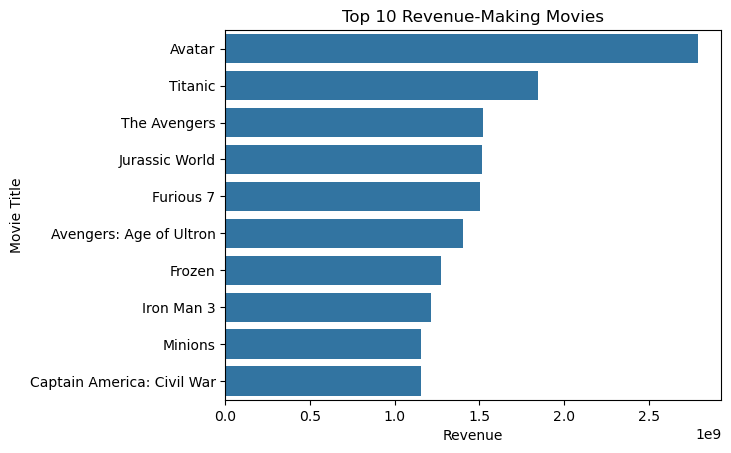

In [70]:
query="""SELECT title, revenue FROM movies ORDER BY revenue DESC LIMIT 10"""
df_revenue=pd.read_sql_query(query,conn)
sns.barplot(x='revenue',y='title',data=df_revenue)
plt.title("Top 10 Revenue-Making Movies")
plt.xlabel("Revenue")
plt.ylabel("Movie Title")
plt.show()

## **Insight:**  
Top-grossing films dominate global box offices, often linked with franchises or award-winning production teams.


## ANALYSIS 4:

## Voting Analysis:

### Query 18: Find the most popular movie with highest vote average.

In [75]:
h_v_avg=pd.DataFrame(curr.execute("select * from movies order by vote_average desc limit 1"))
h_v_avg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,47116,Stiff Upper Lips,0,0,1998-06-12,0,Stiff Upper Lips,10.0,1,Stiff Upper Lips is a broad parody of British ...,None,89861,6332


###  Observation:
The movie **"Stiff Upper Lips"** has the highest vote average of **10.0**, making it the top-rated movie in the dataset.


## ANALYSIS 5:

## Director Analysis:

### Query 19: Name all directors with the number of movies and revenue where revenue should be taken into account for doing the analysis.The director who has highest revenue should come at top and so forth.

In [80]:
d_a=pd.DataFrame(curr.execute("select Name,count(*) as 'Total MOvies',sum(revenue) as 'Total Revenue' from directors join movies on directors.id=movies.director_id group by movies.director_id order by sum(revenue) desc"))
d_a.head()

,0,1,2
0,Steven Spielberg,27,9147393164
1,Peter Jackson,9,6498642820
2,James Cameron,7,5883569439
3,Michael Bay,12,5832524638
4,Christopher Nolan,8,4227483234


### Visualization: Revenue by top directors

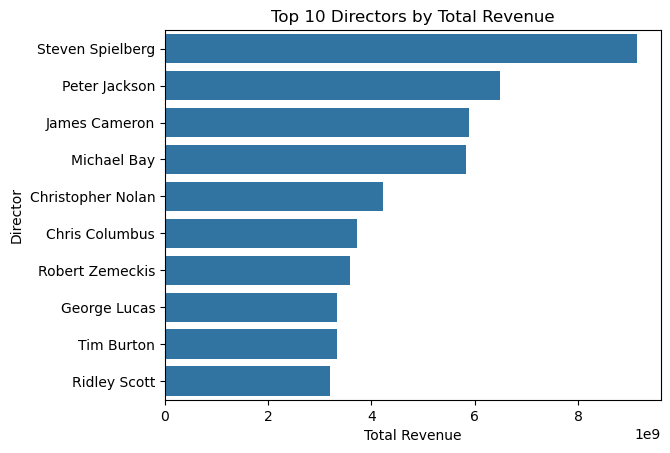

In [82]:
query = """
SELECT d.name AS director, COUNT(m.id) AS movie_count, SUM(m.revenue) AS total_revenue
FROM directors d
JOIN movies m ON d.id = m.director_id
GROUP BY d.name
ORDER BY total_revenue DESC
LIMIT 10
"""
df_dir_rev=pd.read_sql_query(query,conn)
sns.barplot(x='total_revenue',y='director',data=df_dir_rev)
plt.title("Top 10 Directors by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Director")
plt.show()

## **Insight:**  
The most bankable directors consistently generate high box office returns, contributing to industry success.


### Query 20: Name all directors with the number of movies and revenue where no of movies should be taken into account for doing the analysis.The director who has highest no of movie should come at top and so forth.

In [85]:
h_m=pd.DataFrame(curr.execute("select Name,count(title) as 'Total Movies',sum(revenue) as 'Total Revenue' from directors join movies on directors.id=movies.director_id group by movies.director_id order by count(title) desc"))
h_m.head()

,0,1,2
0,Steven Spielberg,27,9147393164
1,Woody Allen,21,669101038
2,Clint Eastwood,20,2512058888
3,Martin Scorsese,20,1956635998
4,Spike Lee,16,340618771


### Observation:
Steven Spielberg directed the most movies (27) and also generated the highest total revenue, followed by Woody Allen and Clint Eastwood.


### Query 21: Give the title,budget,release_date,budget,revenue,popularity and vote_average made Steven Spielberg

In [88]:
s_data=pd.DataFrame(curr.execute("Select title,budget,release_date,revenue,popularity,vote_average from movies join directors on movies.director_id=directors.id where directors.Name=='Steven Spielberg'"))
s_data

,0,1,2,3,4,5
0,Indiana Jones and the Kingdom of the Crystal S...,185000000,2008-05-21,786636033,75,5.7
1,The BFG,140000000,2016-06-01,183345589,44,6.0
2,War of the Worlds,132000000,2005-06-28,591739379,48,6.2
3,The Adventures of Tintin,130000000,2011-10-25,371940071,89,6.7
4,Minority Report,102000000,2002-06-20,358372926,65,7.1
5,A.I. Artificial Intelligence,100000000,2001-06-29,235926552,34,6.8
6,The Lost World: Jurassic Park,73000000,1997-05-23,229074524,2,6.2
7,The Terminal,60000000,2004-06-17,219417255,57,7.0
8,Munich,70000000,2005-12-22,130358911,29,6.9
9,Hook,70000000,1991-12-11,300854823,33,6.6


### Observation:
Steven Spielberg has directed several high-budget movies. Most of them have good popularity and vote averages around 6 to 7.


## Final Conclusion:
This project used SQL queries to explore the IMDb dataset and gain insights about movies, directors, ratings, and revenue. Here are the main findings:

- **Most Bankable Movies**: Big-budget films like *Pirates of the Caribbean* and *Avengers: Age of Ultron* top the list of most bankable movies.
- **Top-Rated Movie**: *Stiff Upper Lips* has the highest vote average, showing exceptional audience ratings.
- **Director Performance**: Steven Spielberg directed the most movies and also earned the highest total revenue among all directors.
- **Director Movie Details**: Spielberg's films are generally high-budget and have consistent popularity and ratings between 6 and 7.
- **Data Overview**: The dataset includes key fields like budget, revenue, popularity, and vote average, which help in analyzing both financial and viewer-based performance.


**Overall**, this project shows how SQL can help uncover interesting insights from a movie dataset by answering real-world business and entertainment questions.